# A Musical Interlude, part 2


## Initialisation

In [32]:
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
with open('./data/output/unique_with_details.json', encoding="utf8") as file:
    raw = json.load(file)
uniqueSongs = pd.json_normalize(raw)
uniqueSongs
# list(uniqueSongs.columns)

,endTime,artistName,trackName,msPlayed,details.album.album_type,details.album.artists,details.album.external_urls.spotify,details.album.href,details.album.id,details.album.images,...,details.href,details.id,details.is_local,details.is_playable,details.name,details.popularity,details.preview_url,details.track_number,details.type,details.uri
0,2021-11-28 18:50,Professor Green,Read All About It,77971,album,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/1DrD9yINGa4J2xb...,https://api.spotify.com/v1/albums/1DrD9yINGa4J...,1DrD9yINGa4J2xb37dGZ8u,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/3bcxgkDLMe1V...,3bcxgkDLMe1VMrvHickfiB,False,True,Read All About It,54,https://p.scdn.co/mp3-preview/214402bf54e53e7d...,3,track,spotify:track:3bcxgkDLMe1VMrvHickfiB
1,2021-12-06 23:59,WALK THE MOON,Shut Up and Dance,119774,album,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/3mNoFlD1wsoXfkl...,https://api.spotify.com/v1/albums/3mNoFlD1wsoX...,3mNoFlD1wsoXfkljfFzExT,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/4kbj5MwxO1bq...,4kbj5MwxO1bq9wjT5g9HaA,False,True,Shut Up and Dance,83,https://p.scdn.co/mp3-preview/78558b79e4571208...,3,track,spotify:track:4kbj5MwxO1bq9wjT5g9HaA
2,2021-12-07 04:49,Stephanie Hsu,A Guy That I'd Kinda Be Into,12068,compilation,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/0758cp4h8LSZeLR...,https://api.spotify.com/v1/albums/0758cp4h8LSZ...,0758cp4h8LSZeLRzrKx2XM,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/3JMuqa4x9ZMW...,3JMuqa4x9ZMWxgA8RaAiya,False,True,A Guy That I'd Kinda Be Into,53,https://p.scdn.co/mp3-preview/6793edabba0cb783...,11,track,spotify:track:3JMuqa4x9ZMWxgA8RaAiya
3,2021-12-07 04:52,Maisie Peters,Boy,178013,album,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/1X1EZB1hCoymZ9g...,https://api.spotify.com/v1/albums/1X1EZB1hCoym...,1X1EZB1hCoymZ9gU8JKv86,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/5EZddmJbPQqc...,5EZddmJbPQqc8IAn0992iK,False,True,Boy,53,https://p.scdn.co/mp3-preview/74ee68bbc8b5b09b...,7,track,spotify:track:5EZddmJbPQqc8IAn0992iK
4,2021-12-07 04:56,Maisie Peters,Feels Like This,223346,single,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/1ziE8y7wGzDY0PD...,https://api.spotify.com/v1/albums/1ziE8y7wGzDY...,1ziE8y7wGzDY0PDgoDXKwF,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/53Wsf11ElpPr...,53Wsf11ElpPr1WAGtRQlcx,False,True,Feels Like This,50,https://p.scdn.co/mp3-preview/2a6ee025f31afa19...,6,track,spotify:track:53Wsf11ElpPr1WAGtRQlcx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,2022-12-07 17:10,Johnny Hodges,The Last Time I Saw Paris,174960,album,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/3oeavlFnbsS7L17...,https://api.spotify.com/v1/albums/3oeavlFnbsS7...,3oeavlFnbsS7L17R8Irxyv,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/1CgkKs5fgX1B...,1CgkKs5fgX1BiYyYZ6ZzZE,False,True,The Last Time I Saw Paris,57,https://p.scdn.co/mp3-preview/d60f71ddb9805df2...,8,track,spotify:track:1CgkKs5fgX1BiYyYZ6ZzZE
4275,2022-12-07 17:11,Ella Fitzgerald,Let's Fall In Love,27365,album,[{'external_urls': {'spotify': 'https://open.s...,https://open.spotify.com/album/6SESAIqP8sQTVp0...,https://api.spotify.com/v1/albums/6SESAIqP8sQT...,6SESAIqP8sQTVp0ZRVcdOq,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",...,https://api.spotify.com/v1/tracks/2RnJD2mTBxqv...,2RnJD2mTBxqvHcqmXk1n9c,False,True,Let's Fall In Love,48,https://p.scdn.co/mp3-preview/9e53b4ac47952df3...,2,track,spotify:track:2RnJD2mTBxqvHcqmXk1n9c
4276,2022-12-07 17:18,Paul Desmond,The Way You Look Tonight - 2003 Remastered,439507,album,[{'ex

This gives around ~4300 rows of songs that I have listened to at some point, and a whole load of details about them. Now we have this, let's define some questions:
1. Does popularity affect how likely I am to listen to a song? (or rather, do I listen to more popular songs?)
3. What does the spread of song lengths look like?

## Does popularity affect how likely I am to listen to a song? (or rather, do I listen to more popular songs?)
TO answer this question, let's first look at the popularity stat's location and spread

In [2]:
uniqueSongs["details.popularity"].describe()

count    4279.000000
mean       51.455247
std        19.844552
min         0.000000
25%        39.000000
50%        53.000000
75%        66.000000
max       100.000000
Name: details.popularity, dtype: float64

So, it seems like popularity has a range of 0 to 100, and a mean of 51.46. [According to the API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-tracks):
> The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
> The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
> Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note: the popularity value may lag actual popularity by a few days: the value is not updated in real time.

From this info it is clear that `popularity` is an index of intergers; it cannot really be treated as continuous data. As such, it is categorical ordinal data. In order to better describe that, let's call up the median:

In [3]:
uniqueSongs["details.popularity"].median()

53.0

On an assumption that the average song scores 50 on the popularity index, It seems like in general I listen to songs that are slighly more popular than spotify's catalog average.

Now, let's look at the index's distribution:

In [15]:
pop = pd.DataFrame(uniqueSongs["details.popularity"])

In [27]:
pop2 = pop.groupby('details.popularity').size()

details.popularity
0      57
1      24
2      15
3      17
4       6
       ..
95      5
96      1
97      2
98      1
100     1
Length: 100, dtype: int64

Text(0.5, 1.0, 'Popularity Index Histogram')

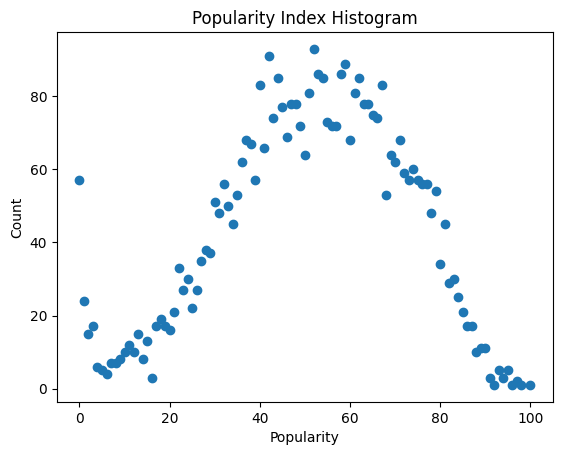

In [33]:
plt.plot(pop2, 'o')
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Popularity Index Histogram")

It looks like in general the popularity of songs follows a normal distribution. Interestingly there seem to be a large number of low popularity (1-5) songs that I have listened to. Possible explanations for these that I can think of include:
* Short intro tracks for albums that you'd listen to once but not again/would skip
* Obscure versions of common songs (e.g. a special album version of a song also released as a single, where the single is the more popular version)
* Songs from very niche artists

Out of interest, let's have a look at the titles and artists of the least popular songs:

In [39]:
uniqueSongs.sort_values(by=['details.popularity']).loc[:,['artistName', 'trackName', 'details.album.album_type','details.popularity']].head(10)

,artistName,trackName,details.album.album_type,details.popularity
1099,Ludovico Einaudi,Divenire,compilation,0
534,Sia,Underneath the Mistletoe,compilation,0
2111,Sara Ray,Body Boys,album,0
796,Samurai,How Did We Get Here?,single,0
63,Sabrina Carpenter,skinny dipping,compilation,0
1486,Morse Code,Morse Code Chapter 1,album,0
783,Dove Cameron,Out Of Touch,album,0
491,The Men from the Ministry,the men from the ministry 1971-11-29 gone to pot,album,0
262,Justin Bieber,Love Yourself,compilation,0
575,Dan Quinn,Never Let You Down,single,0


Track 1,2,5 & 7 can be explained as obscure versions of common songs. Tracks 3, 4 and 10 are all produced by highly obscure indie artists, so it is not a major surprise that they are not especially popular. Interestingly, tracks 6 and 8 are podcasts, which should not have been included in the results given here (and should have brought up an error when searching for them in the API). The obvious answer to why this is the case is that when they were uploaded, they were classified as a song rather than a podcast (perhaps they were uploaded before podcasts were officially supported by spotify).

Thus, working back to the question, we can conclude that there is correlation between the popularity of a song and how likely I am to listen to it, although it is unclear as to whether popularity drives listening. From knowledge of how spotify's algorithm works it is clear that they are more likely to recommend highly popular songs, although there is no obvious spike at the top end to reflect this. 

## What does the spread of song lengths look like?
The length of each song is defined in the `details.duration_ms` field, in milliseconds. Let's convert that to seconds, as that will make more sense

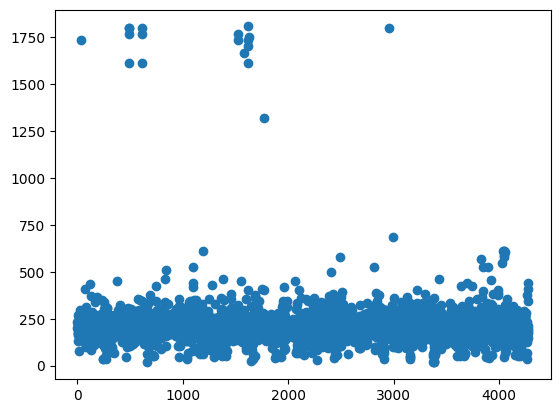

In [47]:
uniqueSongs['length'] = uniqueSongs['details.duration_ms'].div(1000).astype(int)
plt.plot(uniqueSongs['length'], 'o')

The chart above shows that almost all tracks are less than 500 seconds (8m20) in length. That's still quite long though, so let's look at the longest 10 tracks:

In [53]:
uniqueSongs.sort_values(by=['length'], ascending=False).loc[:,['artistName', 'trackName', 'length','details.album.album_type']].head(20)

,artistName,trackName,length,details.album.album_type
1622,The Men From the Ministry,The War with the Isle of Wight,1806,album
2960,The Men From the Ministry,A Matter of Form,1798,album
488,The Men from the Ministry,the men from the ministry 1974-08-26 they fry ...,1798,album
487,The Men from the Ministry,the men from the ministry 1974-08-12 health an...,1798,album
615,The Men from the Ministry,the men from the ministry 1971-09-16 the finge...,1798,album
1526,The Men From the Ministry,Moderately Important Person,1767,album
491,The Men from the Ministry,the men from the ministry 1971-11-29 gone to pot,1767,album
616,The Men from the Ministry,the men from the ministry 1971-08-19 we all ma...,1767,album
1624,The Men From the Ministry,The Big Rocket,1751,album
1623,The Men From the Ministry,The Great Footwear Scandal,1733,album


So, the top 17 tracks are all podcasts. They aren't really "songs", so let's remove them. Additionally, `The Most Unwanted Song` is nearly twice as long as the second longest song `All Too Well (10 minute version)`, so let's just remove anything with a length over 1000 seconds (16m20)

In [62]:
songs2 = uniqueSongs.query('length < 1000')
songs2.sort_values(by=['length'], ascending=False).loc[:,['artistName', 'trackName', 'length','details.album.album_type']].head(20)

,artistName,trackName,length,details.album.album_type
2992,Taylor Swift,All Too Well (10 Minute Version) (The Short Film),686,single
1194,Taylor Swift,All Too Well (10 Minute Version) (Taylor's Ver...,613,album
4042,Mark Sparling,Somewhere in the Woods (Long Hike),612,album
4050,Paradox Interactive,Pernu Apparel (From Cities: Skylines Original ...,611,album
4047,Paradox Interactive,Aukio (From Cities: Skylines Original Game Sou...,611,album
4053,Paradox Interactive,Yaxu (From Cities: Skylines Original Game Soun...,606,album
4051,Paradox Interactive,Pop Soda (From Cities: Skylines Original Game ...,606,album
4049,Paradox Interactive,Morello's Cookies (From Cities: Skylines Origi...,606,album
4052,Paradox Interactive,Stern Berger (From Cities: Skylines Original G...,591,album
2490,John Elliott,All Too Well - Jake's Version,578,single


All of these tracks are songs, and all seem to make sense. Other than Taylor Swift's 10 minute versions of `All Too Well`, it seems like most of the longest songs are either Game Soundtracks, songs from Musicals, Orchestral pieces or hip-hop songs. This maks sense - all of these are areas where the length is unlikely to affect listernership (or actually be beneficial e.g. in the case of game soundtracks)

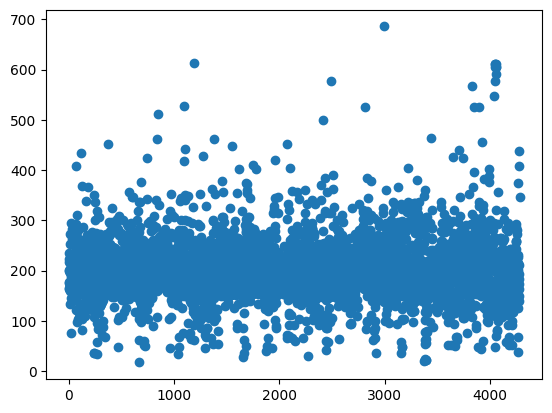

In [63]:
plt.plot(songs2['length'], 'o')

The Chart actually still shows a similar picture - that the majority of songs are in the 100-300 second range, with a reasonable number of outliers above and below that. For completeness, let's look at the shortest 20 songs:

In [64]:
songs2.sort_values(by=['length']).loc[:,['artistName', 'trackName', 'length','details.album.album_type']].head(20)

,artistName,trackName,length,details.album.album_type
664,'Come From Away' Company,10 Years Later,17,album
3375,Orchestra,"Tuning - Original Broadway Cast Recording: ""Sp...",19,compilation
3386,John Du Prez,The Intermission - Original Broadway Cast Reco...,22,compilation
3388,Christian Borle,Historian's Introduction to Act II - Original ...,22,compilation
3382,Hank Azaria,He Is Not Dead Yet - Play Off - Original Broad...,23,compilation
1650,Bastille,Brave New World - Interlude,27,album
2269,Lee MacDougall,The Dover Fault,29,album
1042,J.PERIOD,Stay Alive - Interlude,33,album
270,Bo Burnham,Unpaid Intern,34,album
241,Cast of High School Musical: The Musical: The ...,We're All in This Together - Wildcat Chant,35,compilation


This is interesting - Almost all of these tracks seem to be intro or connection pieces, with most being from the musical theatre genre. I can't identify any that don't fit into the intro category, so let's assume that they all fit.

So, to conclude, most songs are between 100 and 300 seconds in length; the very shortest songs tend to be intro or connection pieces, often from musical theatre. The longest pieces tend to be game soundtracks, musical theatre pieces, orchestral or hip-hop. 